In [1]:
import numpy as np

from scipy import stats
from scipy. stats import skew
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv('TX_Rate_Change_Excercise_-_Data.csv')
df.head()

,state,product_,date,created_by,leads,prelim_quotes,final_qotes,purchases,cr
0,al,ho3,7/1/2018,Agent,4,4,4,0,0.0
1,al,ho3,7/1/2018,Online,18,12,3,0,0.0
2,al,ho3,7/2/2018,Agent,2,2,2,0,0.0
3,al,ho3,7/2/2018,Online,19,13,1,0,0.0
4,al,ho3,7/3/2018,Agent,5,5,3,1,0.2


In [3]:
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M').astype("str")
df.columns
df.head()

,state,product_,date,created_by,leads,prelim_quotes,final_qotes,purchases,cr,month_year
0,al,ho3,7/1/2018,Agent,4,4,4,0,0.0,2018-07
1,al,ho3,7/1/2018,Online,18,12,3,0,0.0,2018-07
2,al,ho3,7/2/2018,Agent,2,2,2,0,0.0,2018-07
3,al,ho3,7/2/2018,Online,19,13,1,0,0.0,2018-07
4,al,ho3,7/3/2018,Agent,5,5,3,1,0.2,2018-07


### ASSUMPTIONS AND GROUND WORK

#### 1. Here let us convert the number of leads, prelim_quotes, final_qotes, purchases to ratios because individually all the numbers are "VANITY METRICS" unless there is a ratio, we cannot know the inner meanings of these numbers.

#### 2. Here we have changed the pricing algorithm, so the primary goal metric would be %customers who have purchased after obtaining the quote. That metric= purchases/prelim_quotes

#### 3. The α value is a threshold we set, by which we say “if the probability of observing a result as extreme or more (p-value) is lower than α, then we reject the Null hypothesis”. Since our α=0.05 (indicating 5% probability), our confidence (1 — α) is 95%.

In [4]:
def find_ratios(df):
    
    df["Prelim_lead_ratio"] = round(df["prelim_quotes"]/df["leads"],3)
    df["final_Prelim_ratio"] = round(df["final_qotes"]/df["prelim_quotes"],3)
    df["purchases_prelim_ratio"] = round(df["purchases"]/df["prelim_quotes"],3)
    df["purchases_final_ratio"] = round(df["purchases"]/df["final_qotes"],3)
    df["purchases_lead_ratio"] = round(df["purchases"]/df["leads"],3)
    
    return df

### Let us check how different do agent and online website deal with the customers

### 2. Comparing Agent and online for ho3 Product

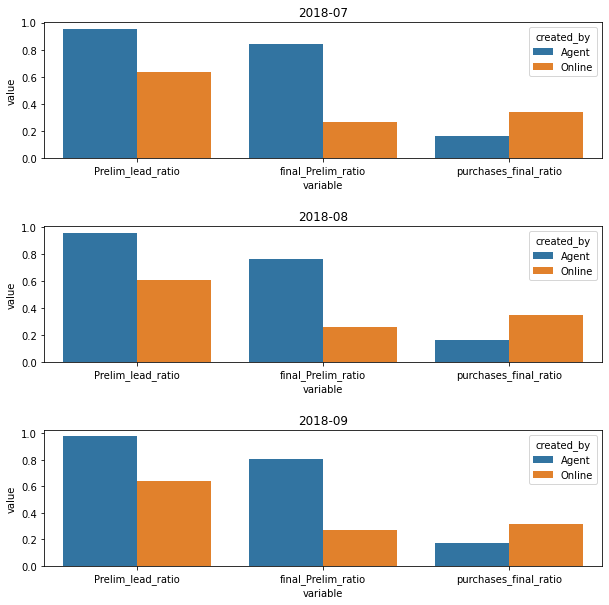

In [5]:
df2 = find_ratios(df[df.product_=="ho3"].groupby(["month_year","created_by"])\
                  ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes = axes.flatten()
for i,j in zip(df2.month_year.unique(),axes):
    df3=pd.melt(df2[df2["month_year"]==i], id_vars=['created_by'], \
                value_vars=["Prelim_lead_ratio","final_Prelim_ratio","purchases_final_ratio"])
    sns.barplot(data = df3 , x="variable", hue="created_by",y="value",ax=j)
    j.set_title(i)
    plt.subplots_adjust(hspace = 0.5)

### 3. Comparing Agent and online for  ho6 Product

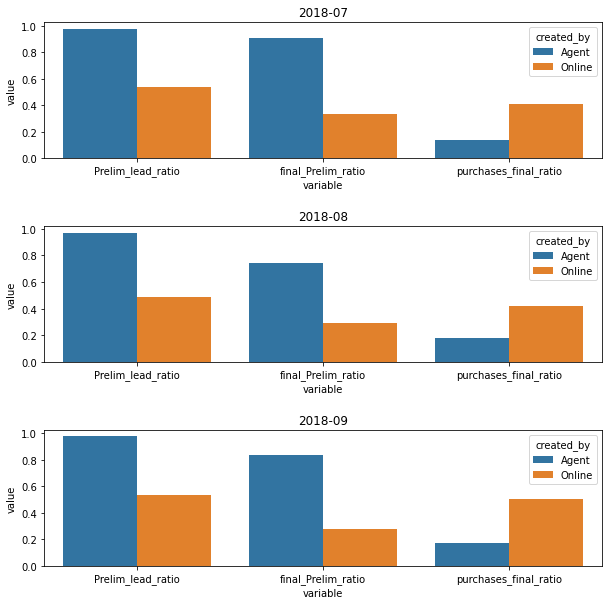

In [6]:
df2 = find_ratios(df[df.product_=="ho6"].groupby(["month_year","created_by"])\
                  ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes = axes.flatten()
for i,j in zip(df2.month_year.unique(),axes):
    df3=pd.melt(df2[df2["month_year"]==i], id_vars=['created_by'], \
                value_vars=["Prelim_lead_ratio","final_Prelim_ratio","purchases_final_ratio"])
    sns.barplot(data = df3 , x="variable", hue="created_by",y="value",ax=j)
    j.set_title(i)
    plt.subplots_adjust(hspace = 0.5)

### SUMMARY 0:
Upon Inspection, we can definitely say that even though we have high initial ratios(Prelim_lead_ratio,  final_Prelim_ratio ) for agents, the purchases_final_ratio are very less than that of online.

This can be due to following reasons.

1. Since the number of leads by agents is very low compared to online, the initial ratios show very high number.
For instance agent has leads in single digit number, where as we see a higher number of leads for online users, thus the ratio is more for agents.

2. Agents approach customers rather than customers approaching the product, therefore we may high prelim_lead ratio. Users
may hesitate in saying no to the agent but gradually when the agent shares the quote with the customers they reject the offer.


### Recommendation 0 : 
Initially when the product is in its initial stages, by reaching to the customers we are introducing our product to them. But as we built the product and there has been a buzz around, It is better to leave for the customers to approach the product at their free will. As we know the digital reach of the product is much faster and effective than through agent, we should work on our market reach approaches and campaigns to bridge the gap between product and customer.

### Let us Break the Analysis into Four parts:
   1. Agent and h03 product
   2. Online and h03 product
   3. Agent and h06 product 
   4. Online and ho6 product

For each part of the analysis, we would do two comparisons as shown below 

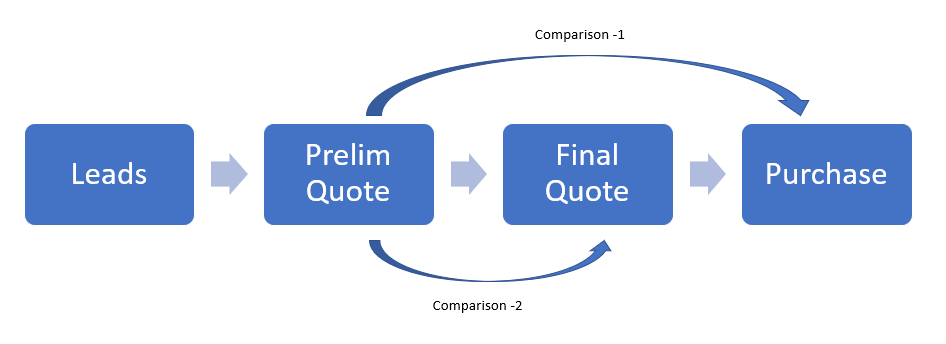

### PART - 1, Agent and h03 product

In [7]:
df_summary_1 = find_ratios(df[(df.product_=="ho3") & (df.created_by=="Agent")].\
                           groupby(["state","month_year"])\
                           ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

#### Since our point of focus is texas, assuming all other states are equally marketed or reachable to customers, Let us take the point estimate for all the other states. 

In [8]:
# we are removing tx and wi and thus creating two more dfs
# df_summary_12 = Summary of all states except texas ,removing Wi and nv as they dont all three months data

df_summary_12 = find_ratios(df_summary_1[(df_summary_1["state"]!="tx") & (df_summary_1["state"]!="wi")\
                                        & (df_summary_1["state"]!="nv")].\
                            groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_12["Data"]="All_states"

df_summary_12

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,3096,2935,2465,418,0.948,0.840,0.142,0.170,0.135,All_states
2018-08,3873,3672,2679,457,0.948,0.730,0.124,0.171,0.118,All_states
2018-09,3211,3120,2445,442,0.972,0.784,0.142,0.181,0.138,All_states


In [9]:
# df_summary_13 = Summary of texas state

df_summary_13 = find_ratios(df_summary_1[(df_summary_1["state"]=="tx")].groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_13["Data"]="Texas"

df_summary_13

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,1588,1533,1291,193,0.965,0.842,0.126,0.149,0.122,Texas
2018-08,2002,1943,1588,240,0.971,0.817,0.124,0.151,0.120,Texas
2018-09,1678,1651,1404,218,0.984,0.850,0.132,0.155,0.130,Texas


In [10]:
data_concat = pd.concat([df_summary_13,df_summary_12]).reset_index()

In [11]:
all_states_july_prelim_quotes = df_summary_12.loc["2018-07"]["prelim_quotes"]
all_states_july_purchases =df_summary_12.loc["2018-07"]["purchases"]
all_states_july_final =df_summary_12.loc["2018-07"]["final_qotes"]

all_states_aug_prelim_quotes = df_summary_12.loc["2018-08"]["prelim_quotes"]
all_states_aug_purchases =df_summary_12.loc["2018-08"]["purchases"]
all_states_aug_final =df_summary_12.loc["2018-08"]["final_qotes"]

all_states_sep_prelim_quotes = df_summary_12.loc["2018-09"]["prelim_quotes"]
all_states_sep_purchases =df_summary_12.loc["2018-09"]["purchases"]
all_states_sep_final =df_summary_12.loc["2018-09"]["final_qotes"]

texas_july_prelim_quotes = df_summary_13.loc["2018-07"]["prelim_quotes"]
texas_july_purchases =df_summary_13.loc["2018-07"]["purchases"]
texas_july_final =df_summary_13.loc["2018-07"]["final_qotes"]

texas_aug_prelim_quotes = df_summary_13.loc["2018-08"]["prelim_quotes"]
texas_aug_purchases =df_summary_13.loc["2018-08"]["purchases"]
texas_aug_final =df_summary_13.loc["2018-08"]["final_qotes"]

texas_sept_prelim_quotes = df_summary_13.loc["2018-09"]["prelim_quotes"]
texas_sept_purchases =df_summary_13.loc["2018-09"]["purchases"]
texas_sept_final =df_summary_13.loc["2018-09"]["final_qotes"]

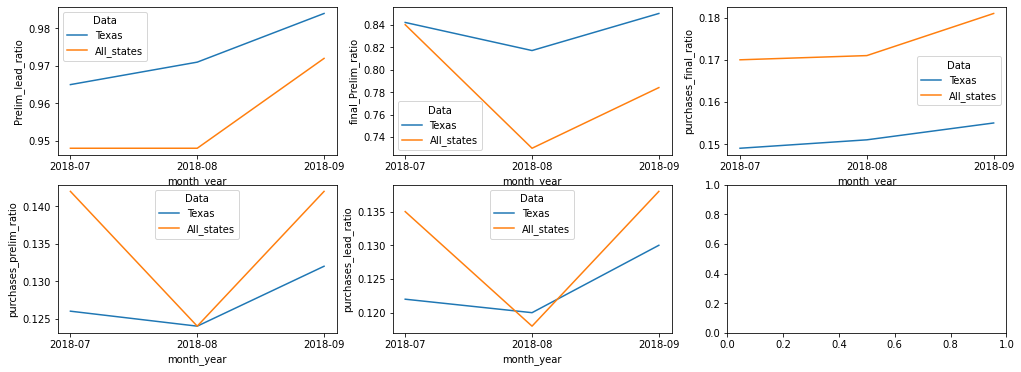

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(17, 6))
axes = axes.flatten()
for i,j in zip(["Prelim_lead_ratio","final_Prelim_ratio","purchases_final_ratio",\
                "purchases_prelim_ratio","purchases_lead_ratio"],axes):

    sns.lineplot(data= data_concat ,y=i , x= "month_year", hue="Data",ax=j)


#### By Visual Inspection: 
   - Nationally(all states except texas) , all the ratios have seen an rise from Aug to September
   - In Texas, all the ratios have seen an increase from Aug to September
   
   
Our main business driver is purchases! Since purchases_prelim_ratio directly relates to our goal let us investigate that proportion for each category.Let us dig deeper for some more evidence

#### We can assume that the process of leads to purchase as binomial distribution with sucess(purchase) and fail(no purchase). Here all the instances are independant of each other. 

1. We will first check for any seasonality/relation among the national average. By seasonality, what if,  every september due to the oncoming of winter/hurricanes, customers insure their houses more than other seasons. We should not link this increase in registrations to the new algorithm. 
2. But to conclude about the above statement we need the data from last year september. As we dont have that data, let us move with our investigation with the available data 


### PROCEDURE

- ##### check whether both "all_states" and "texas" come from same distribution for the month of july and august
- ##### we have to see if there is an overall negative bias or positive bias in texas
- ##### that means, do texans always tend to do less than the country average, more than the country average, at par with country average?
- ##### In other words, do texans use the product ho3 similar to other states??

For that let us do "Normal Approximation Method of the Binomial" 
The use of the Normal Distribution is supported by the central limit theorem and with sufficiently large n, the Normal Distribution is a good estimate of the Binomial Distribution.

Below, a ztest test is performed for the goal metric(purchases_prelim_ratio) proportions in "All_states" and "texas" data.\
H_0 = All proportions are same- texans and other states use the products similarly\
H_1 = proportions are different- texans and other states use the products differently

In [13]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_purchases + all_states_aug_purchases)/2,\
                 (texas_july_purchases + texas_aug_purchases)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_purchases + texas_aug_purchases)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_purchases + all_states_aug_purchases)/2)\
                                                    /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(p_val))

Proportion of success in texas  0.125
Proportion of success in all states  0.132
0.429


p_val> alpha- Fail to reject the Null hypothesis.

There is no evidence to suggest that texans use this product any differently than other states.

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.In september month, Here we have introduced a new pricing algorithm.

H_0 = No increase in proportion after introducing new algorithm\
H_1 = Difference in proportion after introducing new algorithm

In [14]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_purchases,texas_sept_purchases])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in texas " , round((texas_sept_purchases)/texas_sept_prelim_quotes,3))

print ("Proportion of success in all states " , round(all_states_sep_purchases/all_states_sep_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0.021,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in texas  0.132
Proportion of success in all states  0.142
0.140


p_val> alpha, fail to reject null hypothesis. We dont have enough evidence that the new pricing algorothm is actually making a significant improvement in the purchases. 

**What are the reasons that an effect is not detected?**

First, it is possible that the effect truly doesn’t exist in the population, which is why our  hypothesis test didn’t detect it in the sample. \
While that is one possibility, it doesn’t end there.
Another possibility is that the effect exists in the population, but the test didn’t detect it for a variety of reasons. These reasons include the following:

- The sample size was too small to detect the effect.
- The variability in the data was too high. The effect exists, but the noise in data swamped the signal (effect).
- Since this is a slice of data. When dealing with random samples, chance always plays a role in the results. The draw might have caused our sample not to reflect an effect that exists in the population.

#### What about the users who have proceeded to final quote after obtaining the prelimary quote?

Is there any change in the number of users who have went through the full process of obtaining a quote after preliminary quote? It is given by the metric - final_Prelim_ratio. Since we did not find any evidence that there is a significant change in purchases proportion ,we can analyze this final_Prelim_ratio and know whether the customers are backing off after getting the final quotation. We can follow the same procedure which we have followed for purchases_prelim_ratio.


Here the goal metric is final_Prelim_ratio\
H_0 = All proportions are same- texans and other states use the products similarly\
H_1 = proportions are different- texans and other states use the products differently

In [15]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_final + all_states_aug_final)/2,\
                 (texas_july_final + texas_aug_final)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_final + texas_aug_final)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_final + all_states_aug_final)/2)\
                                                    /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs)
print('{0:0.6f}'.format(p_val))

Proportion of success in texas  0.828
Proportion of success in all states  0.779
0.000032


p_val< alpha- Reject the Null hypothesis.

We got evidence to say that texans use this product differently than other states. So, texans have a positive bias of 4.9% 

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.In september month, we have actually introduced a new pricing algorithm.

Here the goal metric is final_Prelim_ratio\
H_0 = No change in this bias after introducing new algorithm\
H_1 = Decrease in bias after introducing new algorithm

In [16]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_final,texas_sept_final])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_final/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_final)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=-0.049,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.784
Proportion of success in texas  0.85
0.070


p_val> alpha- Fail to reject the Null hypothesis\
SO, we got no evidence there has been a increase number of customers from prelims to finals,  no significant increase from prelims to purchases.

### Recommendation 1 : 
1. There are two ways of comparison we can do here, how well the product did with respect to national average or how well the product did with respect to only texas state. TO do the later we should do the analysis with previous years data, which isnt available right now.

2. Here when we compared how well the algorithm did with respect to all states and texas. We did not enough evidence of a significant improvement in purchases.

3. Based on the above information, I conclude that there has not been significant increases in both the metrics final_Prelim_ratio and purchases_prelim_ratio

### PART - 2, Agent and h06 product

In [17]:
df_summary_1 = find_ratios(df[(df.product_=="ho6") & (df.created_by=="Agent")].groupby(["state","month_year"])\
                           ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

#df_summary_1

In [18]:
# we are removing tx and wi and thus creating two more dfs
# df_summary_12 = Summary of all states except texas ,removing Wi and nv as they dont all three months data

df_summary_12 = find_ratios(df_summary_1[(df_summary_1["state"]!="tx") & (df_summary_1["state"]!="wi")\
                                        & (df_summary_1["state"]!="nv")].\
                            groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_12["Data"]="All_states"

df_summary_12

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,413,403,366,54,0.976,0.908,0.134,0.148,0.131,All_states
2018-08,596,577,423,77,0.968,0.733,0.133,0.182,0.129,All_states
2018-09,472,461,387,69,0.977,0.839,0.150,0.178,0.146,All_states


In [19]:
# df_summary_13 = Summary of texas state

df_summary_13 = find_ratios(df_summary_1[(df_summary_1["state"]=="tx")].groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_13["Data"]="Texas"

df_summary_13

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,72,71,64,6,0.986,0.901,0.085,0.094,0.083,Texas
2018-08,96,94,77,14,0.979,0.819,0.149,0.182,0.146,Texas
2018-09,69,67,54,9,0.971,0.806,0.134,0.167,0.130,Texas


In [20]:
data_concat = pd.concat([df_summary_13,df_summary_12]).reset_index()

In [21]:
all_states_july_prelim_quotes = df_summary_12.loc["2018-07"]["prelim_quotes"]
all_states_july_purchases =df_summary_12.loc["2018-07"]["purchases"]
all_states_july_final =df_summary_12.loc["2018-07"]["final_qotes"]

all_states_aug_prelim_quotes = df_summary_12.loc["2018-08"]["prelim_quotes"]
all_states_aug_purchases =df_summary_12.loc["2018-08"]["purchases"]
all_states_aug_final =df_summary_12.loc["2018-08"]["final_qotes"]

all_states_sep_prelim_quotes = df_summary_12.loc["2018-09"]["prelim_quotes"]
all_states_sep_purchases =df_summary_12.loc["2018-09"]["purchases"]
all_states_sep_final =df_summary_12.loc["2018-09"]["final_qotes"]

texas_july_prelim_quotes = df_summary_13.loc["2018-07"]["prelim_quotes"]
texas_july_purchases =df_summary_13.loc["2018-07"]["purchases"]
texas_july_final =df_summary_13.loc["2018-07"]["final_qotes"]

texas_aug_prelim_quotes = df_summary_13.loc["2018-08"]["prelim_quotes"]
texas_aug_purchases =df_summary_13.loc["2018-08"]["purchases"]
texas_aug_final =df_summary_13.loc["2018-08"]["final_qotes"]

texas_sept_prelim_quotes = df_summary_13.loc["2018-09"]["prelim_quotes"]
texas_sept_purchases =df_summary_13.loc["2018-09"]["purchases"]
texas_sept_final =df_summary_13.loc["2018-09"]["final_qotes"]

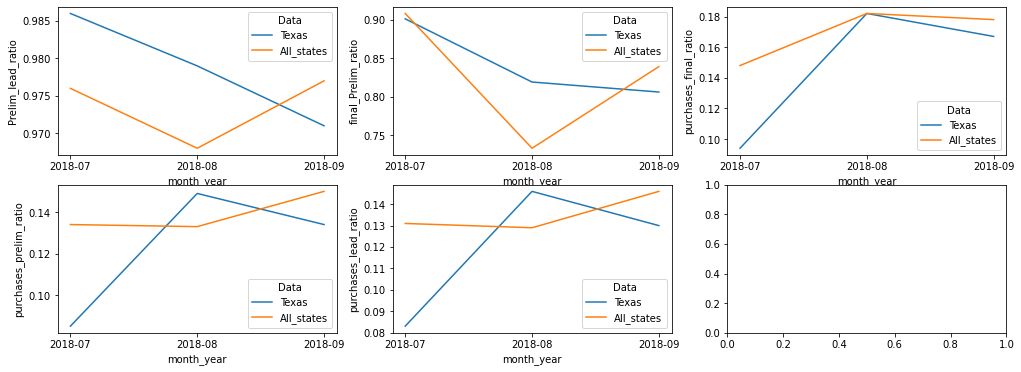

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(17, 6))
axes = axes.flatten()
for i,j in zip(["Prelim_lead_ratio","final_Prelim_ratio","purchases_final_ratio",\
                "purchases_prelim_ratio","purchases_lead_ratio"],axes):

    sns.lineplot(data= data_concat ,y=i , x= "month_year", hue="Data",ax=j)


#### By Visual Inspection: 
   - Nationally(all states except texas) , purchases_prelim_ratio have seen an increase from Aug to September 
   - In Texas, purchases_prelim_ratio have seen an decrease from Aug to September
   

Here also we follow the same process as in part-1 and check how do the texans compare with respect to all states

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
H_0 = All proportions are same\
H_1 = proportions are different

In [23]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_purchases + all_states_aug_purchases)/2,\
                 (texas_july_purchases + texas_aug_purchases)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_purchases + texas_aug_purchases)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_purchases + all_states_aug_purchases)/2)\
                                                      /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs,alternative= "two-sided")
print('{0:0.3f}'.format(p_val))

Proportion of success in texas  0.121
Proportion of success in all states  0.134
0.757


p_val> alpha- Fail to reject the Null hypothesis.

We did not evidence to say that texans use this product any differently than other states.

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.

H_0 = No increase in proportion after introducing new algorithm\
H_1 = Difference in proportion after introducing new algorithm

In [24]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_purchases,texas_sept_purchases])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_purchases/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_purchases+0)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0.00,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.15
Proportion of success in texas  0.134
0.630


p_val> alpha, fail to reject null hypothesis. We dont have enough evidence that the new pricing algorothm is actually making a significant improvement in the purchases. 

#### What about the users who have proceeded to final quote after obtaining the prelimary quote?

Is there any change in the number of users who have went through the full process of obtaining a quote after preliminary quote? It is given by the metric - final_Prelim_ratio. Since we did not find any evidence that there is a significant change in purchases proportion ,we can analyze this final_Prelim_ratio and know whether the customers are backing off after getting the final quotation. We can follow the same procedure which we have followed for purchases_prelim_ratio.


Here the goal metric is final_Prelim_ratio\
H_0 = All proportions are same- texans and other states use the products similarly\
H_1 = proportions are different- texans and other states use the products differently

In [25]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_final + all_states_aug_final)/2,\
                 (texas_july_final + texas_aug_final)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_final + texas_aug_final)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_final + all_states_aug_final)/2)\
                                                    /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs)
print('{0:0.6f}'.format(p_val))

Proportion of success in texas  0.855
Proportion of success in all states  0.805
0.287385


p_val> alpha- Fail to reject the Null hypothesis.

We did not get evidence to say that texans use this product any differently than other states. 

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.In september month, we have actually introduced a new pricing algorithm.

Here the goal metric is final_Prelim_ratio\
H_0 = No increase in proportion after introducing new algorithm\
H_1 = Difference in proportion after introducing new algorithm

In [26]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_final,texas_sept_final])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_final/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_final)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0.0,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.839
Proportion of success in texas  0.806
0.755


p_val> alpha- Fail to reject the Null hypothesis\
SO, we did not get evidence there has been a increase number of customers from final to prelims.


### Recommendation 2 : 
1. There are two ways of comparison we can do here, how well the product did with respect to national average or how well the product did with respect to only texas state. TO do the later we should do the analysis with previous years data, which isnt available right now.

2. Here when we compared how well the algorithm did with respect to all states and texas. We did not enough evidence of a significant improvement in both the metrics. The reasons are stated already.

### PART - 3, Online and h06 product

In [27]:
df_summary_1 = find_ratios(df[(df.product_=="ho6") & (df.created_by=="Online")].groupby(["state","month_year"])\
                           ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

#df_summary_1

In [28]:
# we are removing tx and wi and thus creating two more dfs
# df_summary_12 = Summary of all states except texas ,removing Wi and nv as they dont all three months data

df_summary_12 = find_ratios(df_summary_1[(df_summary_1["state"]!="tx") & (df_summary_1["state"]!="wi")\
                                        & (df_summary_1["state"]!="nv")].\
                            groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_12["Data"]="All_states"

df_summary_12

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,1393,826,306,129,0.593,0.370,0.156,0.422,0.093,All_states
2018-08,1717,900,285,127,0.524,0.317,0.141,0.446,0.074,All_states
2018-09,1275,768,260,134,0.602,0.339,0.174,0.515,0.105,All_states


In [29]:
# df_summary_13 = Summary of texas state

df_summary_13 = find_ratios(df_summary_1[(df_summary_1["state"]=="tx")].groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_13["Data"]="Texas"

df_summary_13

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,650,267,55,19,0.411,0.206,0.071,0.345,0.029,Texas
2018-08,591,217,40,10,0.367,0.184,0.046,0.250,0.017,Texas
2018-09,810,336,50,23,0.415,0.149,0.068,0.460,0.028,Texas


In [30]:
data_concat = pd.concat([df_summary_13,df_summary_12]).reset_index()

In [31]:
all_states_july_prelim_quotes = df_summary_12.loc["2018-07"]["prelim_quotes"]
all_states_july_purchases =df_summary_12.loc["2018-07"]["purchases"]
all_states_july_final =df_summary_12.loc["2018-07"]["final_qotes"]

all_states_aug_prelim_quotes = df_summary_12.loc["2018-08"]["prelim_quotes"]
all_states_aug_purchases =df_summary_12.loc["2018-08"]["purchases"]
all_states_aug_final =df_summary_12.loc["2018-08"]["final_qotes"]

all_states_sep_prelim_quotes = df_summary_12.loc["2018-09"]["prelim_quotes"]
all_states_sep_purchases =df_summary_12.loc["2018-09"]["purchases"]
all_states_sep_final =df_summary_12.loc["2018-09"]["final_qotes"]

texas_july_prelim_quotes = df_summary_13.loc["2018-07"]["prelim_quotes"]
texas_july_purchases =df_summary_13.loc["2018-07"]["purchases"]
texas_july_final =df_summary_13.loc["2018-07"]["final_qotes"]

texas_aug_prelim_quotes = df_summary_13.loc["2018-08"]["prelim_quotes"]
texas_aug_purchases =df_summary_13.loc["2018-08"]["purchases"]
texas_aug_final =df_summary_13.loc["2018-08"]["final_qotes"]

texas_sept_prelim_quotes = df_summary_13.loc["2018-09"]["prelim_quotes"]
texas_sept_purchases =df_summary_13.loc["2018-09"]["purchases"]
texas_sept_final =df_summary_13.loc["2018-09"]["final_qotes"]

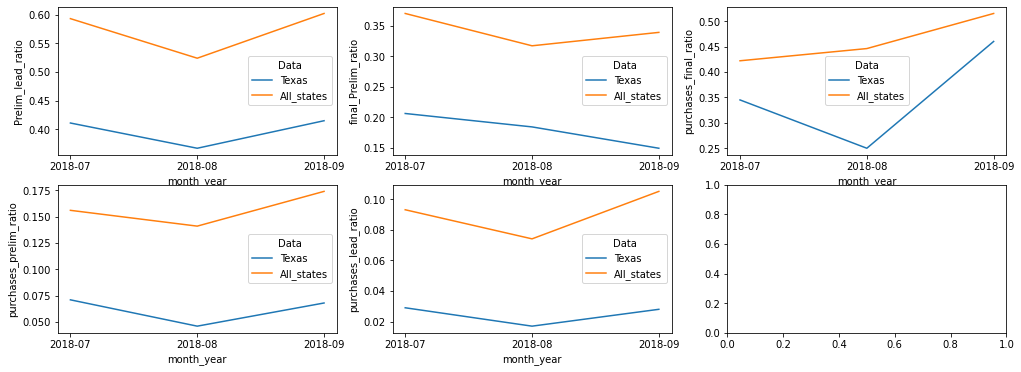

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(17, 6))
axes = axes.flatten()
for i,j in zip(["Prelim_lead_ratio","final_Prelim_ratio","purchases_final_ratio",\
                "purchases_prelim_ratio","purchases_lead_ratio"],axes):

    sns.lineplot(data= data_concat ,y=i , x= "month_year", hue="Data",ax=j)


#### By Visual Inspection: 
   - Nationally(all states except texas) , purchases_prelim_ratio have seen an increase from Aug to September 
   - In Texas, purchases_prelim_ratio have seen an increase from Aug to September
   
   
Our main business driver is purchases! Since purchases_prelim_ratio directly relates to our goal let us investigate that proportion for each category.Let us dig deeper for some more evidence

Here also we follow the same process as in part-1 and check how do the texans compare with respect to all states

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
H_0 = All proportions are same\
H_1 = proportions are different

In [33]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_purchases + all_states_aug_purchases)/2,\
                 (texas_july_purchases + texas_aug_purchases)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_purchases + texas_aug_purchases)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_purchases + all_states_aug_purchases)/2)\
                                                      /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs,alternative= "two-sided")
print('{0:0.3f}'.format(p_val))

Proportion of success in texas  0.06
Proportion of success in all states  0.148
0.000


p_val< alpha- Reject the Null hypothesis.

We have evidence to say that texans use this product differently than other states. On average texans use this product (0.148-0.06)% = 8.8% less than the national average.
We can say that texans have negative bias of 8.8%. After introducing this new algorithm let us check whether there is any difference in this bias.

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.

H_0 = No change in 8.8% bias after introducing new algorithm\
H_1 = Difference in this proportion after introducing new algorithm

In [34]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_purchases,texas_sept_purchases])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_purchases/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_purchases+0)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0.088,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.174
Proportion of success in texas  0.068
0.785


p_val> alpha, fail to reject null hypothesis. We dont have enough evidence that the new pricing algorothm is actually making a significant improvement in the purchases. 

#### What about the users who have proceeded to final quote after obtaining the prelimary quote?

Is there any change in the number of users who have went through the full process of obtaining a quote after preliminary quote? It is given by the metric - final_Prelim_ratio. Since we did not find any evidence that there is a significant change in purchases proportion ,we can analyze this final_Prelim_ratio and know whether the customers are backing off after getting the final quotation. We can follow the same procedure which we have followed for purchases_prelim_ratio.


Here the goal metric is final_Prelim_ratio\
H_0 = All proportions are same- texans and other states use the products similarly\
H_1 = proportions are different- texans and other states use the products differently

In [35]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_final + all_states_aug_final)/2,\
                 (texas_july_final + texas_aug_final)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_final + texas_aug_final)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_final + all_states_aug_final)/2)\
                                                    /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs)
print('{0:0.6f}'.format(p_val))

Proportion of success in texas  0.196
Proportion of success in all states  0.342
0.000014


p_val< alpha- Reject the Null hypothesis.

We have evidence to say that texans use this product differently than other states. On average texans use this product (0.342-0.196)% = 14.6% less than the national average.
We can say that texans have negative bias of 14.6%. After introducing this new algorithm let us check whether there is any difference in this bias.

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.

H_0 = No change in 14.6% bias after introducing new algorithm\
H_1 = Difference in this proportion after introducing new algorithm

In [36]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_final,texas_sept_final])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_final/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_final)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0.146,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.339
Proportion of success in texas  0.149
0.932


### Recommendation 3 : 
1. There are two ways of comparison we can do here, how well the product did with respect to national average or how well the product did with respect to only texas state. TO do the later we should do the analysis with previous years data, which isnt available right now.

2. Here when we compared how well the algorithm did with respect to all states and texas. We did not enough evidence of a significant improvement. The reasons are stated above.

### PART - 4, Online and h03 product

In [37]:
df_summary_1 = find_ratios(df[(df.product_=="ho3") & (df.created_by=="Online")].groupby(["state","month_year"])\
                           ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

#df_summary_1

In [38]:
# we are removing tx and wi and thus creating two more dfs
# df_summary_12 = Summary of all states except texas ,removing Wi and nv as they dont all three months data

df_summary_12 = find_ratios(df_summary_1[(df_summary_1["state"]!="tx") & (df_summary_1["state"]!="wi")\
                                        & (df_summary_1["state"]!="nv")].\
                            groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_12["Data"]="All_states"

df_summary_12

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,10072,6241,1705,579,0.620,0.273,0.093,0.340,0.057,All_states
2018-08,10849,6045,1582,590,0.557,0.262,0.098,0.373,0.054,All_states
2018-09,9040,5391,1409,560,0.596,0.261,0.104,0.397,0.062,All_states


In [39]:
# df_summary_13 = Summary of texas state

df_summary_13 = find_ratios(df_summary_1[(df_summary_1["state"]=="tx")].groupby(["month_year"])\
[["leads","prelim_quotes","final_qotes","purchases"]].sum())

df_summary_13["Data"]="Texas"

df_summary_13

,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio,Data
month_year,,,,,,,,,,
2018-07,4818,3275,852,295,0.680,0.260,0.090,0.346,0.061,Texas
2018-08,6016,4133,1075,332,0.687,0.260,0.080,0.309,0.055,Texas
2018-09,7020,4828,1338,300,0.688,0.277,0.062,0.224,0.043,Texas


In [40]:
data_concat = pd.concat([df_summary_13,df_summary_12]).reset_index()

In [41]:
all_states_july_prelim_quotes = df_summary_12.loc["2018-07"]["prelim_quotes"]
all_states_july_purchases =df_summary_12.loc["2018-07"]["purchases"]
all_states_july_final =df_summary_12.loc["2018-07"]["final_qotes"]

all_states_aug_prelim_quotes = df_summary_12.loc["2018-08"]["prelim_quotes"]
all_states_aug_purchases =df_summary_12.loc["2018-08"]["purchases"]
all_states_aug_final =df_summary_12.loc["2018-08"]["final_qotes"]

all_states_sep_prelim_quotes = df_summary_12.loc["2018-09"]["prelim_quotes"]
all_states_sep_purchases =df_summary_12.loc["2018-09"]["purchases"]
all_states_sep_final =df_summary_12.loc["2018-09"]["final_qotes"]

texas_july_prelim_quotes = df_summary_13.loc["2018-07"]["prelim_quotes"]
texas_july_purchases =df_summary_13.loc["2018-07"]["purchases"]
texas_july_final =df_summary_13.loc["2018-07"]["final_qotes"]

texas_aug_prelim_quotes = df_summary_13.loc["2018-08"]["prelim_quotes"]
texas_aug_purchases =df_summary_13.loc["2018-08"]["purchases"]
texas_aug_final =df_summary_13.loc["2018-08"]["final_qotes"]

texas_sept_prelim_quotes = df_summary_13.loc["2018-09"]["prelim_quotes"]
texas_sept_purchases =df_summary_13.loc["2018-09"]["purchases"]
texas_sept_final =df_summary_13.loc["2018-09"]["final_qotes"]

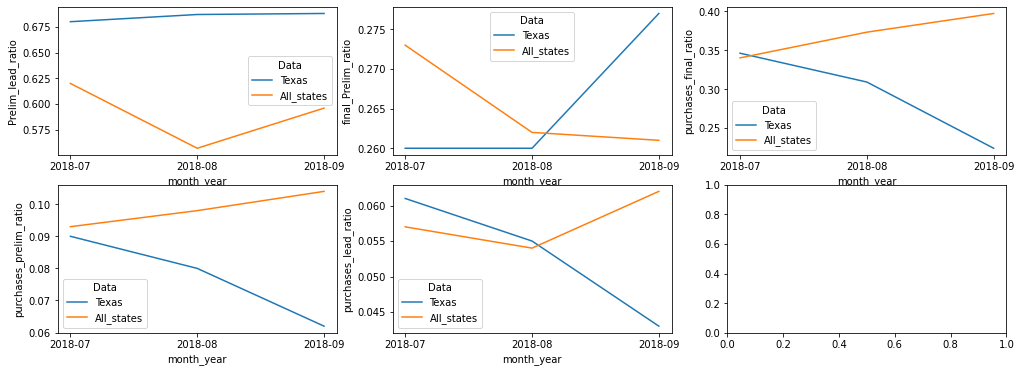

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(17, 6))
axes = axes.flatten()
for i,j in zip(["Prelim_lead_ratio","final_Prelim_ratio","purchases_final_ratio",\
                "purchases_prelim_ratio","purchases_lead_ratio"],axes):

    sns.lineplot(data= data_concat ,y=i , x= "month_year", hue="Data",ax=j)


#### By Visual Inspection: 
   - Nationally(all states except texas) , purchases_prelim_ratio have seen an increase from Aug to September 
   - In Texas, purchases_prelim_ratio have seen an decrease from Aug to September


Here also we follow the same process as in part-1 and check how do the texans compare with respect to all states

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
H_0 = All proportions are same\
H_1 = proportions are different

In [43]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_purchases + all_states_aug_purchases)/2,\
                 (texas_july_purchases + texas_aug_purchases)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_purchases + texas_aug_purchases)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_purchases + all_states_aug_purchases)/2)\
                                                      /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs,alternative= "two-sided")
print('{0:0.3f}'.format(p_val))

Proportion of success in texas  0.085
Proportion of success in all states  0.095
0.079


p_val> alpha- Fail to reject the Null hypothesis.

We did not get evidence to say that texans use this product any differently than other states.

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.

H_0 = No increase in proportion after introducing new algorithm\
H_1 = Difference in proportion after introducing new algorithm

In [44]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(purchase) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_purchases,texas_sept_purchases])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_purchases/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_purchases+0)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0,alternative="two-sided")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.104
Proportion of success in texas  0.062
0.000


p_val< alpha,Reject null hypothesis. We have enough evidence that the new pricing algorothm is actually making a significant decrease in the purchases. 

#### What about the users who have proceeded to final quote after obtaining the prelimary quote?

Is there any change in the number of users who have went through the full process of obtaining a quote after preliminary quote? It is given by the metric - final_Prelim_ratio. Since we did not find any evidence that there is a significant change in purchases proportion ,we can analyze this final_Prelim_ratio and know whether the customers are backing off after getting the final quotation. We can follow the same procedure which we have followed for purchases_prelim_ratio.


Here the goal metric is final_Prelim_ratio\
H_0 = All proportions are same- texans and other states use the products similarly\
H_1 = proportions are different- texans and other states use the products differently

In [45]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave average of july and aug month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([(all_states_july_final + all_states_aug_final)/2,\
                 (texas_july_final + texas_aug_final)/2])

#the number of trials or observations
nobs = np.array([(all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2,\
                (texas_july_prelim_quotes + texas_aug_prelim_quotes)/2 ])

print ("Proportion of success in texas " , round(((texas_july_final + texas_aug_final)/2)\
                                                      /((texas_july_prelim_quotes + texas_aug_prelim_quotes)/2),3))

print ("Proportion of success in all states " , round(((all_states_july_final + all_states_aug_final)/2)\
                                                    /((all_states_july_prelim_quotes + all_states_aug_prelim_quotes)/2),3))
z_val, p_val = proportions_ztest(count, nobs)
print('{0:0.6f}'.format(p_val))

Proportion of success in texas  0.26
Proportion of success in all states  0.268
0.419088


p_val> alpha- Fail to reject the Null hypothesis.

We did not get evidence to say that texans use this product any differently than other states. 

Below, a ztest test is performed for the goal metric proportions in "All_states" and "texas" data.\
Here we are testing for the september month.In september month, we have actually introduced a new pricing algorithm.

Here the goal metric is final_Prelim_ratio\
H_0 = No increase in proportion after introducing new algorithm\
H_1 = Difference in proportion after introducing new algorithm

In [46]:
from statsmodels.stats.proportion import proportions_ztest

#the number of successes in nobs trials
# here we gave sep month success(final_quotes) and trails(prelim_quotes) for "all_states" and texas
count = np.array([all_states_sep_final,texas_sept_final])

#the number of trials or observations
nobs = np.array([all_states_sep_prelim_quotes,texas_sept_prelim_quotes])

print ("Proportion of success in all states " , round(all_states_sep_final/all_states_sep_prelim_quotes,3))
print ("Proportion of success in texas " , round((texas_sept_final)/texas_sept_prelim_quotes,3))
z_val, p_val = proportions_ztest(count, nobs,value=0.0,alternative="smaller")
print('{0:0.3f}'.format(p_val))

Proportion of success in all states  0.261
Proportion of success in texas  0.277
0.036


p_val< alpha- Reject the Null hypothesis.
The number of users have increased from prelims to finals, but number of users from prelims to purchases have decreased. This is definitely alarming.


### Recommendation 4 : 
1. There are two ways of comparison we can do here, how well the product did with respect to national average or how well the product did with respect to only texas state. TO do the later we should do the analysis with previous years data, which isnt available right now.

2. Here when we compared how well the algorithm did with respect to all states and texas. We did not enough evidence of a significant improvement. The reasons are stated above.

## Summary and Final Thoughts

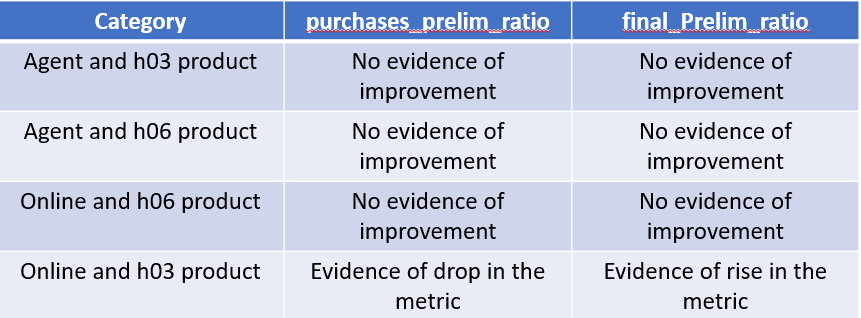

In [49]:
find_ratios(df.groupby(["created_by","product_"])\
                  ["leads","prelim_quotes","final_qotes","purchases"].\
                  sum().reset_index())

,created_by,product_,leads,prelim_quotes,final_qotes,purchases,Prelim_lead_ratio,final_Prelim_ratio,purchases_prelim_ratio,purchases_final_ratio,purchases_lead_ratio
0,Agent,ho3,15555,14957,11971,1976,0.962,0.800,0.132,0.165,0.127
1,Agent,ho6,1739,1694,1390,229,0.974,0.821,0.135,0.165,0.132
2,Online,ho3,48110,30095,7995,2678,0.626,0.266,0.089,0.335,0.056
3,Online,ho6,6488,3347,1008,448,0.516,0.301,0.134,0.444,0.069


As we see from table and dataframe above, Our most popular product with customers (h03 with highest number of leads) has suffered a decline in purchases significantly with the new algorithm. And I think we should relook into the new pricing algorithm intricately and do improvements to again increase our customer leads.!!
